In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from os import path
import gc
l_time_header = ["user_id","grant_time"]
bl_detail_header = ["user_id","bill_time","bank_id","last_bill_amount","last_repay_amount","credit_limit",
                    "bill_balance","lowest_repay_limit","consum_num","bill_amount","adjust_amount","cir_interest",
                    "avail_balance","avail_cash_limit","repay_state"]
basis_path = "C:\\Users\\CDA\\graduated_design\\data\\train_data\\"
l_time_path = path.join(basis_path,"loan_time_train.txt")
bl_detail_path = path.join(basis_path,"bill_detail_train.txt")
#basis_path = os.getcwd()+os.sep+"CDA"+os.sep+"graduated_design"+os.sep+"personal_credit_forecast"+os.sep+"train_data"+os.sep

In [2]:
bill_detail_train = pd.read_table(bl_detail_path,sep = ",",header = None,names = bl_detail_header)
loan_time_train = pd.read_table(l_time_path,sep = ",",header = None,names = l_time_header)
bill_detail_train = pd.merge(bill_detail_train,loan_time_train,how = "left",on = "user_id")
bill_detail_train.iloc[35:40,:]

user_id   bill_time  bank_id  last_bill_amount  last_repay_amount  \
35     3150  5928408614       11          0.000000           0.000000   
36     3150  5928416062       11          0.000000           0.000000   
37     3150  5928649480       16        -16.292183          18.203739   
38     6965           0       10         20.027371          19.317344   
39     6965           0       10         19.983264          17.915546   

    credit_limit  bill_balance  lowest_repay_limit  consum_num  bill_amount  \
35      0.000000     16.754592           13.758662           0     0.000000   
36      0.000000    -15.834102            0.000000           0     0.000000   
37     19.460445     19.075522           16.373474           1    19.467589   
38     19.971271     19.983264           16.987546           5    19.194742   
39     19.971271     19.889440           16.893721           2    16.166307   

    adjust_amount  cir_interest  avail_balance  avail_cash_limit  repay_state  \
35            0.0      0.000000            0.0          0.000000            0   
36            0.0      0.000000            0.0          0.000000            0   
37            0.0      0.000000            0.0         19.460445            0   
38            0.0     15.728101            0.0         19.278123            0   
39            0.0     15.778343            0.0         19.278123            0   

    grant_time  
35  5919867087  
36  5919867087  
37  5919867087  
38  5923841487  
39  5923841487

In [33]:
print(len(bill_detail_train))
print(len(bill_detail_train[bill_detail_train["bill_time"] ==0]))
print(len(bill_detail_train[bill_detail_train["bill_time"] < bill_detail_train["grant_time"]]))
print(len(bill_detail_train[bill_detail_train["bill_time"] > bill_detail_train["grant_time"]]))
print(len(bill_detail_train[bill_detail_train["bill_time"] == bill_detail_train["grant_time"]]))


2338118
427447
1956765
376968
4385


In [3]:
bill_detail_train_timeNa = bill_detail_train.copy(deep = True)
bill_detail_train_timeNa['bill_time'].replace(0,np.nan,inplace = True)#427447 NAN for bill_time
#print(bill_detail_train_timeNa.isnull().any())
#bill_detail_train_timeint = bill_detail_train_timeNa.copy(deep = True)
#bill_detail_train_timeint["bill_time"].interpolate(method='linear',axis = 0,inplace = True,limit_direction = "both")
#print(bill_detail_train_timeNa.iloc[35:40,1:3])
#bill_detail_train_timeint["bank_id"].value_counts()


In [6]:
print(len(bill_detail_train_timeNa[["user_id"]].drop_duplicates().iloc[:,:]))#not all users have credit consumption record,53174
print(len(loan_time_train))

53174
55596


deal with the duplicated data,and use some of them to make features

In [4]:
dup_bill_detail_train = bill_detail_train_timeNa[bill_detail_train_timeNa.duplicated()].copy(deep = True)
print(dup_bill_detail_train.isnull().any())
len(dup_bill_detail_train)

user_id               False
bill_time              True
bank_id               False
last_bill_amount      False
last_repay_amount     False
credit_limit          False
bill_balance          False
lowest_repay_limit    False
consum_num            False
bill_amount           False
adjust_amount         False
cir_interest          False
avail_balance         False
avail_cash_limit      False
repay_state           False
grant_time            False
dtype: bool


534695

In [20]:
#x1 = gb["bank_id"].agg({"duplicated_count":"count"})
m_loan_time_train = loan_time_train.copy(deep = True)
#dup_bill_detail_train["duplicated_counts"] = x1.iloc[:,1]
def make_new_cols(pre,suf,cols,data_name,main_table):
    gb = data_name.groupby("user_id",as_index = False)
    for col_name in cols:
        x = gb[col_name].agg({pre+col_name+suf:suf})
        main_table[pre+col_name+suf] = x.iloc[:,1]
    return main_table
#dup_table["duplicated_last_bill_amountmean"].isnull().value_counts()
#len(dup_bill_detail_train.user_id.unique())
m_loan_time_train.iloc[:1]


user_id  grant_time
0        1  5914855887

In [12]:
dup_table1 = make_new_cols("duplicated_","sum",bl_detail_header[3:14],dup_bill_detail_train,m_loan_time_train.iloc[:,:1])
dup_table2 = make_new_cols("duplicated_","max",bl_detail_header[3:14],dup_bill_detail_train,m_loan_time_train.iloc[:,:1])
dup_table3 = make_new_cols("duplicated_","median",bl_detail_header[3:14],dup_bill_detail_train,m_loan_time_train.iloc[:,:1])
dup_table4 = make_new_cols("duplicated_","mean",bl_detail_header[3:14],dup_bill_detail_train,m_loan_time_train.iloc[:,:1])
dup_table5 = make_new_cols("duplicated_","std",bl_detail_header[3:14],dup_bill_detail_train,m_loan_time_train.iloc[:,:1])



print(dup_bill_detail_train.columns)
dup_table_result = pd.merge(dup_table1,dup_table2，how = "inner",on = "user_id")
dup_table_result = pd.merge(dup_table_result,dup_table3, how = "inner",on = "user_id")
dup_table_result = pd.merge(dup_table_result,dup_table4,,how = "inner",on = "user_id")
dup_table_result = pd.merge(dup_table_result,dup_table5,,how = "inner",on = "user_id")

#np.set_printoptions(threshold='nan')
pd.set_option('display.max_colwidth',1000)
#pd.set_option('max_colwidth',200)
print(dup_table_result.columns)
dup_table_result.iloc[0:3,:]

Index(['user_id', 'bill_time', 'bank_id', 'last_bill_amount',
       'last_repay_amount', 'credit_limit', 'bill_balance',
       'lowest_repay_limit', 'consum_num', 'bill_amount', 'adjust_amount',
       'cir_interest', 'avail_balance', 'avail_cash_limit', 'repay_state',
       'grant_time'],
      dtype='object')
Index(['user_id', 'duplicated_last_bill_amountsum',
       'duplicated_last_repay_amountsum', 'duplicated_credit_limitsum',
       'duplicated_bill_balancesum', 'duplicated_lowest_repay_limitsum',
       'duplicated_consum_numsum', 'duplicated_bill_amountsum',
       'duplicated_adjust_amountsum', 'duplicated_cir_interestsum',
       'duplicated_avail_balancesum', 'duplicated_avail_cash_limitsum',
       'duplicated_last_bill_amountmax', 'duplicated_last_repay_amountmax',
       'duplicated_credit_limitmax', 'duplicated_bill_balancemax',
       'duplicated_lowest_repay_limitmax', 'duplicated_consum_nummax',
       'duplicated_bill_amountmax', 'duplicated_adjust_amountmax',
  

user_id  duplicated_last_bill_amountsum  duplicated_last_repay_amountsum  \
0        1                      288.359232                       598.574592   
1        2                        0.000000                        17.670684   
2        3                      869.663882                       960.542153   

   duplicated_credit_limitsum  duplicated_bill_balancesum  \
0                  586.024419                 -120.491203   
1                   21.069883                   21.068260   
2                 1112.893990                  904.546771   

   duplicated_lowest_repay_limitsum  duplicated_consum_numsum  \
0                        203.624313                     139.0   
1                         18.765676                       0.0   
2                        502.186272                      22.0   

   duplicated_bill_amountsum  duplicated_adjust_amountsum  \
0                 365.859925                          0.0   
1                   0.000000                          0.0   
2                 991.466389                          0.0   

   duplicated_cir_interestsum               ...                 \
0                         0.0               ...                  
1                         0.0               ...                  
2                         0.0               ...                  

   duplicated_last_repay_amountmean  duplicated_credit_limitmean  \
0                         20.640503                    20.207739   
1                         17.670684                    21.069883   
2                         17.152538                    19.873107   

   duplicated_bill_balancemean  duplicated_lowest_repay_limitmean  \
0                    -4.154869                           7.021528   
1                    21.068260                          18.765676   
2                    16.152621                           8.967612   

   duplicated_consum_nummean  duplicated_bill_amountmean  \
0                   4.793103                   12.615859   
1                   0.000000                    0.000000   
2                   0.392857                   17.704757   

   duplicated_adjust_amountmean  duplicated_cir_interestmean  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   

   duplicated_avail_balancemean  duplicated_avail_cash_limitmean  
0                      5.010969                        14.693940  
1                      0.000000                        20.376736  
2                      0.000000                         7.917801  

[3 rows x 45 columns]

In [20]:
gb1 = dup_bill_detail_train.groupby("user_id")
dup_table_result["duplicated_counts"] = gb1["bank_id"].count()
#dup_table_result["duplicated_counts"].isnull().value_counts()
dup_table_result.replace(np.nan,0,inplace = True)
dup_table_result.to_csv(basis_path+"bill_temp_table\\dup_table_result.csv",index = None,header = True,encoding = "utf8")


In [95]:
print(len(bill_detail_train_timeNa[bill_detail_train_timeint["repay_state"]==1]))
print(len(bill_detail_train_timeNa))
print(len(bill_detail_train_timeNa)/len(bill_detail_train_timeint[bill_detail_train_timeint["repay_state"]==1]))

273
2338118
8564.534798534798


remove the duplicated data,then deal with the data with NAN bill_time

In [168]:
bill_detail_train_timeNa.drop_duplicates(keep = "first",inplace = True)
print(len(bill_detail_train_timeNa[bill_detail_train_timeint["repay_state"]==1]))
print(len(bill_detail_train_timeNa))
print(len(bill_detail_train_timeNa)/len(bill_detail_train_timeint[bill_detail_train_timeint["repay_state"]==1]))

272
1803423
6605.945054945055


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [169]:
bill_detail_train_timeNa.iloc[0:3,:]

user_id     bill_time  bank_id  last_bill_amount  last_repay_amount  \
0     3150  5.906744e+09        6         18.626118          18.661937   
1     3150  5.906744e+09        6         18.905766          18.909954   
2     3150  5.906744e+09        6         19.113305          19.150290   

   credit_limit  bill_balance  lowest_repay_limit  consum_num  bill_amount  \
0     20.664418     18.905766           17.847133           1          0.0   
1     20.664418     19.113305           17.911506           1          0.0   
2     20.664418     19.300194           17.977610           1          0.0   

   adjust_amount  cir_interest  avail_balance  avail_cash_limit  repay_state  \
0            0.0           0.0            0.0         19.971271            0   
1            0.0           0.0            0.0         19.971271            0   
2            0.0           0.0            0.0         19.971271            0   

   grant_time  
0  5919867087  
1  5919867087  
2  5919867087

0.6559980659002352 0.14623579714797916 0.0017122993329906516 0.1960538376187949


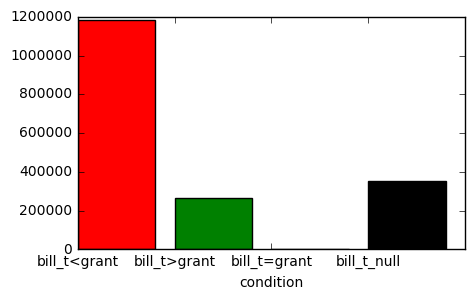

In [195]:
a = len(bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"] < bill_detail_train_timeNa["grant_time"]])
b = len(bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"] > bill_detail_train_timeNa["grant_time"]])
c = len(bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"] == bill_detail_train_timeNa["grant_time"]])
d = len(bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"].isnull()])
e = a + b + c + d
print(a/e,b/e,c/e,d/e)
lst = [a,b,c,d]
fig,ax = plt.subplots(figsize = (5,3))
ax.bar(range(4),lst,width = 0.8,color = "rgbk")
ax.set_xlabel("condition")
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["bill_t<grant","bill_t>grant","bill_t=grant","bill_t_null"])
plt.show()


In [238]:
null_time_table = bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"].isnull()].copy(deep = True)
null_time_table.iloc[:3,:]

user_id  bill_time  bank_id  last_bill_amount  last_repay_amount  \
38     6965        NaN       10         20.027371          19.317344   
39     6965        NaN       10         19.983264          17.915546   
42     1265        NaN       10         20.170074          21.438223   

    credit_limit  bill_balance  lowest_repay_limit  consum_num  bill_amount  \
38     19.971271     19.983264           16.987546           5    19.194742   
39     19.971271     19.889440           16.893721           2    16.166307   
42     20.153592     20.050741           17.055015           0    21.406063   

    adjust_amount  cir_interest  avail_balance  avail_cash_limit  repay_state  \
38            0.0     15.728101            0.0         19.278123            0   
39            0.0     15.778343            0.0         19.278123            0   
42            0.0      0.000000            0.0          0.000000            0   

    grant_time  
38  5923841487  
39  5923841487  
42  5915892687

In [241]:
nul_time_table1 = make_new_cols("nul_time","sum",bl_detail_header[3:14],null_time_table,m_loan_time_train.iloc[:,0:1])
nul_time_table2 = make_new_cols("nul_time","max",bl_detail_header[3:14],null_time_table,m_loan_time_train.iloc[:,0:1])
nul_time_table3 = make_new_cols("nul_time","median",bl_detail_header[3:14],null_time_table,m_loan_time_train.iloc[:,0:1])
nul_time_table4 = make_new_cols("nul_time","mean",bl_detail_header[3:14],null_time_table,m_loan_time_train.iloc[:,0:1])
nul_time_table5 = make_new_cols("nul_time","std",bl_detail_header[3:14],null_time_table,m_loan_time_train.iloc[:,0:1])

nul_time_result = pd.merge(nul_time_table1,nul_time_table2,on = "user_id")
nul_time_result = pd.merge(nul_time_result,nul_time_table3,on = "user_id")
nul_time_result = pd.merge(nul_time_result,nul_time_table4,on = "user_id")
nul_time_result = pd.merge(nul_time_result,nul_time_table5,on = "user_id")


gb2 = null_time_table.groupby("user_id")
nul_time_result["nul_time_counts"] = gb2["bank_id"].count()
nul_time_result.iloc[0:3,:]


user_id  nul_timelast_bill_amountsum  nul_timelast_repay_amountsum  \
0        1                    17.389606                     17.389606   
1        2                    36.733542                     37.160348   
2        3                    41.358453                     37.079520   

   nul_timecredit_limitsum  nul_timebill_balancesum  \
0                19.460445                16.656269   
1                36.723666                36.696541   
2                41.328836                41.272092   

   nul_timelowest_repay_limitsum  nul_timeconsum_numsum  \
0                      15.366101                    1.0   
1                      32.091301                    4.0   
2                      36.948737                    0.0   

   nul_timebill_amountsum  nul_timeadjust_amountsum  nul_timecir_interestsum  \
0               16.656269                       0.0                      0.0   
1               37.162823                       0.0                      0.0   
2               35.914512                       0.0                      0.0   

        ...         nul_timecredit_limitmean  nul_timebill_balancemean  \
0       ...                        19.460445                 16.656269   
1       ...                        18.361833                 18.348270   
2       ...                        20.664418                 20.636046   

   nul_timelowest_repay_limitmean  nul_timeconsum_nummean  \
0                       15.366101                     1.0   
1                       16.045651                     2.0   
2                       18.474369                     0.0   

   nul_timebill_amountmean  nul_timeadjust_amountmean  \
0                16.656269                        0.0   
1                18.581412                        0.0   
2                17.957256                        0.0   

   nul_timecir_interestmean  nul_timeavail_balancemean  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   

   nul_timeavail_cash_limitmean  nul_time_counts  
0                      0.000000              NaN  
1                      0.000000              NaN  
2                     19.971271              1.0  

[3 rows x 46 columns]

In [242]:
nul_time_result.to_csv(basis_path+"bill_temp_table\\nul_time_result.csv",index = None,encoding = "utf8")

deal with all the data(with duplicated record)

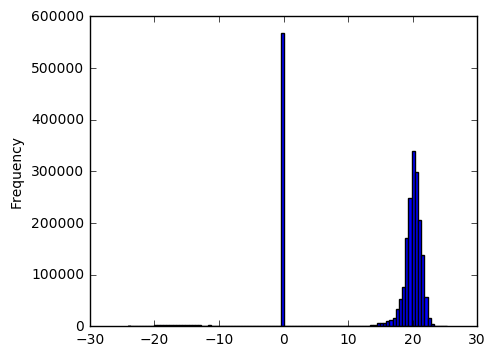

In [257]:
bill_detail_train.iloc[0:5,:]
fig,ax = plt.subplots(figsize = (5,4))
bill_detail_train["last_bill_amount"].plot(bins = 100,kind = "hist",ax = ax)
plt.show()
#for index,col_name in enumerate(bill_detail_train.columns[3:14]):
#    print(col_name)
#    bill_detail_train[col_name].plot(kind = "hist",ax = axes[index])

4


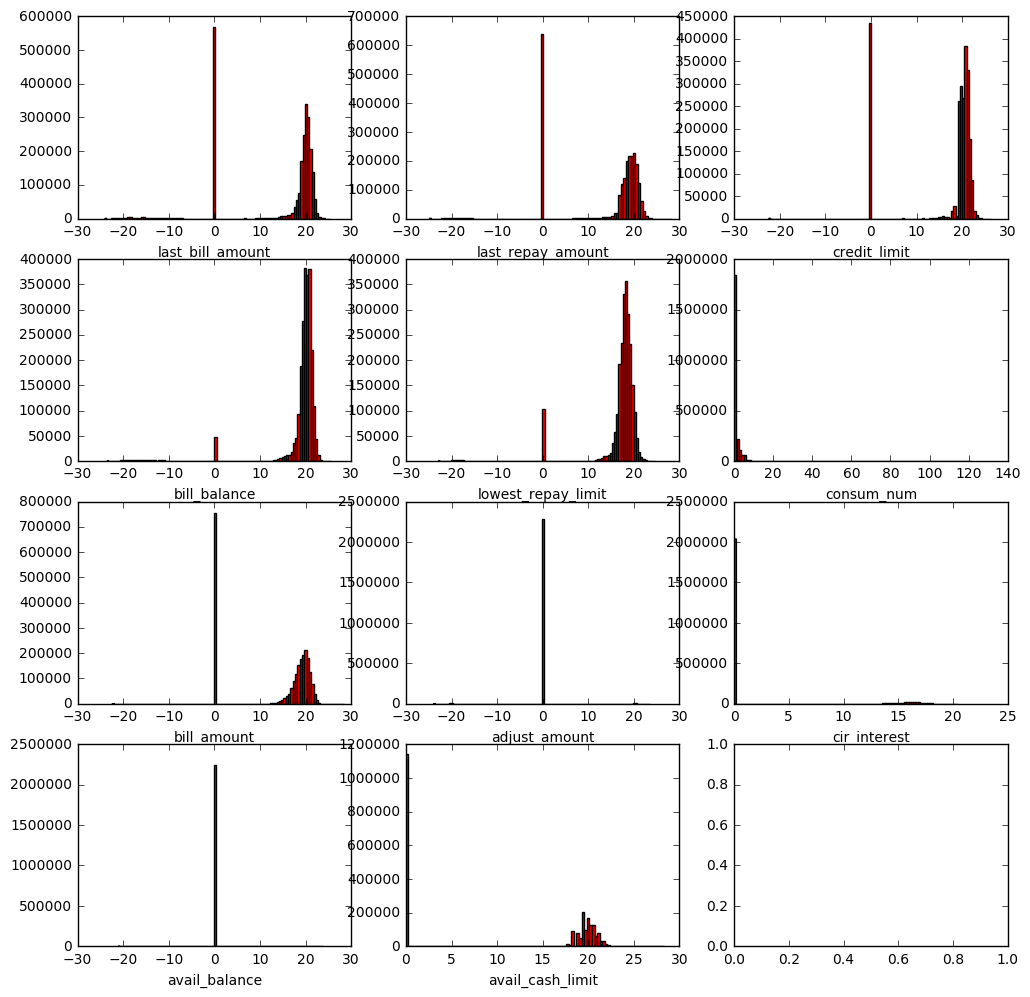

In [55]:
feture = bl_detail_header[3:14]
def plot_hist(conti_col,table):
    r = int(np.ceil(len(conti_col)/3))
    c = 3
    fig, axes = plt.subplots(r,c,figsize = (12,3*r))
    col = 0
    print(r)
    if r > 1:
        for i in range(r):
            for j in range(c):
                if col < len(conti_col):
                    axes[i,j].hist(table[conti_col[col]],bins = 100,color = "r")
                    axes[i,j].set_xlabel(conti_col[col])  
                    #axes[i,j].set_yticks("")
                    #axes[i,j].set_ylabel("total_count")
                    #ax.hist(user_info_train["gender"],bins = 3,normed = False, histtype = "bar", facecolor = "r",bottom = 4)
                    col = col + 1
                else:
                    break
    else:
        print(r)
        for j in range(c):
            if col < len(conti_col):
                axes[j].hist(table[conti_col[col]],bins = 100,color = "r")
                axes[j].set_xlabel(conti_col[col])  
                col = col + 1
            else:
                break
    plt.subplots_adjust()
    plt.show()
plot_hist(feture,bill_detail_train)

In [15]:
all_time_table = bill_detail_train_timeNa.copy(deep = True)
all_time_table1 = make_new_cols("all_","sum",bl_detail_header[3:14],all_time_table,m_loan_time_train.iloc[:,0:1])
all_time_table2 = make_new_cols("all_","mean",bl_detail_header[3:14],all_time_table,m_loan_time_train.iloc[:,0:1])
all_time_table3 = make_new_cols("all_","median",bl_detail_header[3:14],all_time_table,m_loan_time_train.iloc[:,0:1])
all_time_table4 = make_new_cols("all_","std",bl_detail_header[3:14],all_time_table,m_loan_time_train.iloc[:,0:1])
all_time_table5 = make_new_cols("all_","max",bl_detail_header[3:14],all_time_table,m_loan_time_train.iloc[:,0:1])

all_time_result = pd.merge(all_time_table1,all_time_table2,how = "inner", on = "user_id")
all_time_result = pd.merge(all_time_result,all_time_table3,how = "inner", on = "user_id")
all_time_result = pd.merge(all_time_result,all_time_table4,how = "inner", on = "user_id")
all_time_result = pd.merge(all_time_result,all_time_table5,how = "inner", on = "user_id")


gb3 = all_time_table.groupby("user_id")
all_time_result["all_time_counts"] = gb3["bank_id"].count()
#print(len(all_time_table["user_id"].unique())
all_time_result.iloc[:3,:]


user_id  all_last_bill_amountsum  all_last_repay_amountsum  \
0        1               360.734470                351.387237   
1        2                36.733542                 37.160348   
2        3               261.650351                178.153143   

   all_credit_limitsum  all_bill_balancesum  all_lowest_repay_limitsum  \
0           428.696405           457.057503                 301.508459   
1            36.723666            36.696541                  32.091301   
2           577.987348           678.506333                 628.451974   

   all_consum_numsum  all_bill_amountsum  all_adjust_amountsum  \
0               58.0          352.352004                   0.0   
1                4.0           37.162823                   0.0   
2                2.0          263.290061                   0.0   

   all_cir_interestsum       ...         all_credit_limitmax  \
0                  0.0       ...                   21.580708   
1                  0.0       ...                   18.361833   
2                  0.0       ...                   20.441274   

   all_bill_balancemax  all_lowest_repay_limitmax  all_consum_nummax  \
0            21.605425                  19.166874                9.0   
1            18.371030                  16.068406                3.0   
2            20.575036                  19.222057                2.0   

   all_bill_amountmax  all_adjust_amountmax  all_cir_interestmax  \
0           21.680054                   0.0                  0.0   
1           19.480767                   0.0                  0.0   
2           19.553419                   0.0                  0.0   

   all_avail_balancemax  all_avail_cash_limitmax  all_time_counts  
0              0.000000                20.376736              NaN  
1              0.000000                 0.000000              NaN  
2             19.662141                18.767298             23.0  

[3 rows x 57 columns]

In [16]:
all_time_result.to_csv(basis_path+"bill_temp_table\\all_time_result.csv",index = None,header = True,encoding = "utf8")
check_all_time_result = pd.read_csv(basis_path+"bill_temp_table\\all_time_result.csv",header = "infer")
check_all_time_result.iloc[:3,:]

user_id  all_last_bill_amountsum  all_last_repay_amountsum  \
0        1               360.734470                351.387237   
1        2                36.733542                 37.160348   
2        3               261.650351                178.153143   

   all_credit_limitsum  all_bill_balancesum  all_lowest_repay_limitsum  \
0           428.696405           457.057503                 301.508459   
1            36.723666            36.696541                  32.091301   
2           577.987348           678.506333                 628.451974   

   all_consum_numsum  all_bill_amountsum  all_adjust_amountsum  \
0               58.0          352.352004                   0.0   
1                4.0           37.162823                   0.0   
2                2.0          263.290061                   0.0   

   all_cir_interestsum       ...         all_credit_limitmax  \
0                  0.0       ...                   21.580708   
1                  0.0       ...                   18.361833   
2                  0.0       ...                   20.441274   

   all_bill_balancemax  all_lowest_repay_limitmax  all_consum_nummax  \
0            21.605425                  19.166874                9.0   
1            18.371030                  16.068406                3.0   
2            20.575036                  19.222057                2.0   

   all_bill_amountmax  all_adjust_amountmax  all_cir_interestmax  \
0           21.680054                   0.0                  0.0   
1           19.480767                   0.0                  0.0   
2           19.553419                   0.0                  0.0   

   all_avail_balancemax  all_avail_cash_limitmax  all_time_counts  
0              0.000000                20.376736              NaN  
1              0.000000                 0.000000              NaN  
2             19.662141                18.767298             23.0  

[3 rows x 57 columns]

deal with all data (with duplicated data) in three conditions

In [16]:
bill_all_aft = bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"]>=bill_detail_train_timeNa["grant_time"]].copy()
bill_all_bef = bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"]<bill_detail_train_timeNa["grant_time"]].copy()
bill_all_timeNAN = bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"].isnull()].copy()
print(len(bill_all_aft))
print(len(bill_all_aft[bill_all_aft.duplicated()]))
print(len(bill_all_aft.drop_duplicates()))

print(len(bill_all_bef))
print(len(bill_all_bef[bill_all_bef.duplicated()]))
print(len(bill_all_bef.drop_duplicates()))

print(len(bill_all_timeNAN))
print(len(bill_all_timeNAN[bill_all_timeNAN.duplicated()]))
print(len(bill_all_timeNAN.drop_duplicates()))



381353
114540
266813
1529318
346276
1183042
427447
73879
353568


In [18]:
bill_aft_eachu_duplicted_count = bill_all_aft[bill_all_aft.duplicated()].groupby("user_id")["bank_id"].count()
bill_bef_eachu_duplicted_count = bill_all_bef[bill_all_bef.duplicated()].groupby("user_id")["bank_id"].count()
bill_timeNAN_eachu_duplicted_count = bill_all_timeNAN[bill_all_timeNAN.duplicated()].groupby("user_id")["bank_id"].count()

print(len(bill_aft_eachu_duplicted_count))
print(len(bill_bef_eachu_duplicted_count))
print(len(bill_timeNAN_eachu_duplicted_count))

9605
14458
4278


In [21]:
bill_bef_all_table1 = make_new_cols("bill_all_bef","sum",bl_detail_header[3:14],bill_all_bef,m_loan_time_train.iloc[:,0:1])
bill_bef_all_table2 = make_new_cols("bill_all_bef","max",bl_detail_header[3:14],bill_all_bef,m_loan_time_train.iloc[:,0:1])
bill_bef_all_table3 = make_new_cols("bill_all_bef","median",bl_detail_header[3:14],bill_all_bef,m_loan_time_train.iloc[:,0:1])
bill_bef_all_table4 = make_new_cols("bill_all_bef","mean",bl_detail_header[3:14],bill_all_bef,m_loan_time_train.iloc[:,0:1])
bill_bef_all_table5 = make_new_cols("bill_all_bef","std",bl_detail_header[3:14],bill_all_bef,m_loan_time_train.iloc[:,0:1])

bill_bef_all_result = pd.merge(bill_bef_all_table1,bill_bef_all_table2,on = "user_id")
bill_bef_all_result = pd.merge(bill_bef_all_result,bill_bef_all_table3,on = "user_id")
bill_bef_all_result = pd.merge(bill_bef_all_result,bill_bef_all_table4,on = "user_id")
bill_bef_all_result = pd.merge(bill_bef_all_result,bill_bef_all_table5,on = "user_id")

gb6 = bill_all_bef.groupby("user_id")
bill_bef_all_result["bill_bef_all_counts"] = gb6["bank_id"].count()
bill_bef_all_result["bill_bef_eachu_duplicted_count"] = bill_bef_eachu_duplicted_count
bill_bef_all_result["bill_bef_eachu_duplicted_count"].replace(np.nan,0,inplace = True)
bill_bef_all_result.to_csv(basis_path+"bill_temp_table\\bill_bef_all_result.csv",index = None,header = True,encoding = "utf8")
read_bill_bef_all_result = pd.read_csv(basis_path+"bill_temp_table\\bill_bef_all_result.csv")
read_bill_bef_all_result.iloc[:3,:]

user_id  bill_all_beflast_bill_amountsum  bill_all_beflast_repay_amountsum  \
0        1                       136.760811                        135.406663   
1        2                       144.813292                        105.148045   
2        3                       296.822014                        289.286843   

   bill_all_befcredit_limitsum  bill_all_befbill_balancesum  \
0                   139.365030                   176.806257   
1                   338.422883                   372.743693   
2                   348.958827                   297.547743   

   bill_all_beflowest_repay_limitsum  bill_all_befconsum_numsum  \
0                          88.329982                       24.0   
1                         346.818948                        2.0   
2                         291.448253                       56.0   

   bill_all_befbill_amountsum  bill_all_befadjust_amountsum  \
0                  136.072147                           0.0   
1                  158.766677                           0.0   
2                  214.111454                           0.0   

   bill_all_befcir_interestsum               ...                \
0                          0.0               ...                 
1                          0.0               ...                 
2                          0.0               ...                 

   bill_all_befbill_balancestd  bill_all_beflowest_repay_limitstd  \
0                     1.661103                          15.286036   
1                     1.388633                           1.079304   
2                     9.193217                           4.480440   

   bill_all_befconsum_numstd  bill_all_befbill_amountstd  \
0                   2.958040                    8.701724   
1                   0.447214                    9.082494   
2                   3.097675                    9.629024   

   bill_all_befadjust_amountstd  bill_all_befcir_intereststd  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   

   bill_all_befavail_balancestd  bill_all_befavail_cash_limitstd  \
0                      0.000000                         6.792245   
1                      5.638174                         9.556570   
2                     11.070722                         9.371557   

   bill_bef_all_counts  bill_bef_eachu_duplicted_count  
0                  NaN                             0.0  
1                  NaN                             0.0  
2                  9.0                             0.0  

[3 rows x 58 columns]

In [23]:
bill_aft_all_table1 = make_new_cols("bill_all_aft","sum",bl_detail_header[3:14],bill_all_aft,m_loan_time_train.iloc[:,0:1])
bill_aft_all_table2 = make_new_cols("bill_all_aft","max",bl_detail_header[3:14],bill_all_aft,m_loan_time_train.iloc[:,0:1])
bill_aft_all_table3 = make_new_cols("bill_all_aft","median",bl_detail_header[3:14],bill_all_aft,m_loan_time_train.iloc[:,0:1])
bill_aft_all_table4 = make_new_cols("bill_all_aft","mean",bl_detail_header[3:14],bill_all_aft,m_loan_time_train.iloc[:,0:1])
bill_aft_all_table5 = make_new_cols("bill_all_aft","std",bl_detail_header[3:14],bill_all_aft,m_loan_time_train.iloc[:,0:1])

bill_aft_all_result = pd.merge(bill_aft_all_table1,bill_aft_all_table2,on = "user_id")
bill_aft_all_result = pd.merge(bill_aft_all_result,bill_aft_all_table3,on = "user_id")
bill_aft_all_result = pd.merge(bill_aft_all_result,bill_aft_all_table4,on = "user_id")
bill_aft_all_result = pd.merge(bill_aft_all_result,bill_aft_all_table5,on = "user_id")

gb7 = bill_all_aft.groupby("user_id")
bill_aft_all_result["bill_aft_all_counts"] = gb7["bank_id"].count()
bill_aft_all_result["bill_aft_eachu_duplicted_count"] = bill_aft_eachu_duplicted_count
bill_aft_all_result["bill_aft_eachu_duplicted_count"].replace(np.nan,0,inplace = True)
bill_aft_all_result.to_csv(basis_path+"bill_temp_table\\bill_aft_all_result.csv",index = None,header = True,encoding = "utf8")
read_bill_aft_all_result = pd.read_csv(basis_path+"bill_temp_table\\bill_bef_all_result.csv")
read_bill_aft_all_result.iloc[:3,:]

user_id  bill_all_beflast_bill_amountsum  bill_all_beflast_repay_amountsum  \
0        1                       136.760811                        135.406663   
1        2                       144.813292                        105.148045   
2        3                       296.822014                        289.286843   

   bill_all_befcredit_limitsum  bill_all_befbill_balancesum  \
0                   139.365030                   176.806257   
1                   338.422883                   372.743693   
2                   348.958827                   297.547743   

   bill_all_beflowest_repay_limitsum  bill_all_befconsum_numsum  \
0                          88.329982                       24.0   
1                         346.818948                        2.0   
2                         291.448253                       56.0   

   bill_all_befbill_amountsum  bill_all_befadjust_amountsum  \
0                  136.072147                           0.0   
1                  158.766677                           0.0   
2                  214.111454                           0.0   

   bill_all_befcir_interestsum               ...                \
0                          0.0               ...                 
1                          0.0               ...                 
2                          0.0               ...                 

   bill_all_befbill_balancestd  bill_all_beflowest_repay_limitstd  \
0                     1.661103                          15.286036   
1                     1.388633                           1.079304   
2                     9.193217                           4.480440   

   bill_all_befconsum_numstd  bill_all_befbill_amountstd  \
0                   2.958040                    8.701724   
1                   0.447214                    9.082494   
2                   3.097675                    9.629024   

   bill_all_befadjust_amountstd  bill_all_befcir_intereststd  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   

   bill_all_befavail_balancestd  bill_all_befavail_cash_limitstd  \
0                      0.000000                         6.792245   
1                      5.638174                         9.556570   
2                     11.070722                         9.371557   

   bill_bef_all_counts  bill_bef_eachu_duplicted_count  
0                  NaN                             0.0  
1                  NaN                             0.0  
2                  9.0                             0.0  

[3 rows x 58 columns]

In [24]:
bill_timeNAN_all_table1 = make_new_cols("bill_all_timeNAN_","sum",bl_detail_header[3:14],bill_all_timeNAN,m_loan_time_train.iloc[:,0:1])
bill_timeNAN_all_table2 = make_new_cols("bill_all_timeNAN_","max",bl_detail_header[3:14],bill_all_timeNAN,m_loan_time_train.iloc[:,0:1])
bill_timeNAN_all_table3 = make_new_cols("bill_all_timeNAN_","median",bl_detail_header[3:14],bill_all_timeNAN,m_loan_time_train.iloc[:,0:1])
bill_timeNAN_all_table4 = make_new_cols("bill_all_timeNAN_","mean",bl_detail_header[3:14],bill_all_timeNAN,m_loan_time_train.iloc[:,0:1])
bill_timeNAN_all_table5 = make_new_cols("bill_all_timeNAN_","std",bl_detail_header[3:14],bill_all_timeNAN,m_loan_time_train.iloc[:,0:1])

bill_timeNAN_all_result = pd.merge(bill_timeNAN_all_table1,bill_timeNAN_all_table2,on = "user_id")
bill_timeNAN_all_result = pd.merge(bill_timeNAN_all_result,bill_timeNAN_all_table3,on = "user_id")
bill_timeNAN_all_result = pd.merge(bill_timeNAN_all_result,bill_timeNAN_all_table4,on = "user_id")
bill_timeNAN_all_result = pd.merge(bill_timeNAN_all_result,bill_timeNAN_all_table5,on = "user_id")

gb7 = bill_all_timeNAN.groupby("user_id")
bill_timeNAN_all_result["bill_timeNAN_all_counts"] = gb7["bank_id"].count()
bill_timeNAN_all_result["bill_timeNAN_eachu_duplicted_count"] = bill_timeNAN_eachu_duplicted_count
bill_timeNAN_all_result["bill_timeNAN_eachu_duplicted_count"].replace(np.nan,0,inplace = True)
bill_timeNAN_all_result.to_csv(basis_path+"bill_temp_table\\bill_timeNAN_all_result.csv",index = None,header = True,encoding = "utf8")
read_bill_timeNAN_all_result = pd.read_csv(basis_path+"bill_temp_table\\bill_timeNAN_all_result.csv")
read_bill_timeNAN_all_result.iloc[:3,:]

user_id  bill_all_timeNAN_last_bill_amountsum  \
0        1                             17.389606   
1        2                             36.733542   
2        3                             41.358453   

   bill_all_timeNAN_last_repay_amountsum  bill_all_timeNAN_credit_limitsum  \
0                              17.389606                         19.460445   
1                              37.160348                         36.723666   
2                              37.079520                         41.328836   

   bill_all_timeNAN_bill_balancesum  bill_all_timeNAN_lowest_repay_limitsum  \
0                         16.656269                               15.366101   
1                         36.696541                               32.091301   
2                         41.272092                               36.948737   

   bill_all_timeNAN_consum_numsum  bill_all_timeNAN_bill_amountsum  \
0                             1.0                        16.656269   
1                             4.0                        37.162823   
2                             0.0                        35.914512   

   bill_all_timeNAN_adjust_amountsum  bill_all_timeNAN_cir_interestsum  \
0                                0.0                               0.0   
1                                0.0                               0.0   
2                                0.0                               0.0   

                  ...                  bill_all_timeNAN_bill_balancestd  \
0                 ...                                               NaN   
1                 ...                                          0.032187   
2                 ...                                          0.057327   

   bill_all_timeNAN_lowest_repay_limitstd  bill_all_timeNAN_consum_numstd  \
0                                     NaN                             NaN   
1                                0.032181                        1.414214   
2                                0.055190                        0.000000   

   bill_all_timeNAN_bill_amountstd  bill_all_timeNAN_adjust_amountstd  \
0                              NaN                                NaN   
1                         1.271881                                0.0   
2                         0.789752                                0.0   

   bill_all_timeNAN_cir_intereststd  bill_all_timeNAN_avail_balancestd  \
0                               NaN                                NaN   
1                               0.0                                0.0   
2                               0.0                                0.0   

   bill_all_timeNAN_avail_cash_limitstd  bill_timeNAN_all_result  \
0                                   NaN                      NaN   
1                                   0.0                      NaN   
2                                   0.0                      1.0   

   bill_timeNAN_eachu_duplicted_count  
0                                 0.0  
1                                 0.0  
2                                 0.0  

[3 rows x 58 columns]

droping duplicated record,deal with all the data of the others

In [34]:
unique_time_bill_table = bill_detail_train_timeNa.drop_duplicates()
unique_time_bill_table1 = make_new_cols("unique_time","sum",bl_detail_header[3:14],unique_time_bill_table,m_loan_time_train.iloc[:,0:1])
unique_time_bill_table2 = make_new_cols("unique_time","max",bl_detail_header[3:14],unique_time_bill_table,m_loan_time_train.iloc[:,0:1])
unique_time_bill_table3 = make_new_cols("unique_time","median",bl_detail_header[3:14],unique_time_bill_table,m_loan_time_train.iloc[:,0:1])
unique_time_bill_table4 = make_new_cols("unique_time","mean",bl_detail_header[3:14],unique_time_bill_table,m_loan_time_train.iloc[:,0:1])
unique_time_bill_table5 = make_new_cols("unique_time","std",bl_detail_header[3:14],unique_time_bill_table,m_loan_time_train.iloc[:,0:1])

unique_time_bill_result = pd.merge(unique_time_bill_table1,unique_time_bill_table2,on = "user_id")
unique_time_bill_result = pd.merge(unique_time_bill_result,unique_time_bill_table3,on = "user_id")
unique_time_bill_result = pd.merge(unique_time_bill_result,unique_time_bill_table4,on = "user_id")
unique_time_bill_result = pd.merge(unique_time_bill_result,unique_time_bill_table5,on = "user_id")

unique_time_bill_result.iloc[0:3,:]

user_id  unique_timelast_bill_amountsum  unique_timelast_repay_amountsum  \
0        1                      360.734470                       351.387237   
1        2                       36.733542                        37.160348   
2        3                      261.650351                       178.153143   

   unique_timecredit_limitsum  unique_timebill_balancesum  \
0                  428.696405                  457.057503   
1                   36.723666                   36.696541   
2                  577.987348                  678.506333   

   unique_timelowest_repay_limitsum  unique_timeconsum_numsum  \
0                        301.508459                      58.0   
1                         32.091301                       4.0   
2                        628.451974                       2.0   

   unique_timebill_amountsum  unique_timeadjust_amountsum  \
0                 352.352004                          0.0   
1                  37.162823                          0.0   
2                 263.290061                          0.0   

   unique_timecir_interestsum               ...                \
0                         0.0               ...                 
1                         0.0               ...                 
2                         0.0               ...                 

   unique_timelast_repay_amountstd  unique_timecredit_limitstd  \
0                         8.412232                    5.952184   
1                         1.294225                    0.000000   
2                         8.111593                    8.012845   

   unique_timebill_balancestd  unique_timelowest_repay_limitstd  \
0                    1.691511                         12.054797   
1                    0.032187                          0.032181   
2                    1.350478                          0.976732   

   unique_timeconsum_numstd  unique_timebill_amountstd  \
0                  2.660649                   8.454005   
1                  1.414214                   1.271881   
2                  0.333333                   8.831817   

   unique_timeadjust_amountstd  unique_timecir_intereststd  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   

   unique_timeavail_balancestd  unique_timeavail_cash_limitstd  
0                     0.000000                        9.923160  
1                     0.000000                        0.000000  
2                     4.254823                        9.370367  

[3 rows x 56 columns]

In [35]:
gb4 = unique_time_bill_table.groupby("user_id")
unique_time_bill_result["unique_time_counts"] = gb4["bank_id"].count()
unique_time_bill_result.to_csv(basis_path+"bill_temp_table\\unique_time_bill_result.csv",index = None,header = True,encoding = "utf8")
read_unique_time_bill_result = pd.read_csv(basis_path+"bill_temp_table\\unique_time_bill_result.csv")
read_unique_time_bill_result.iloc[:3,:]

user_id  unique_timelast_bill_amountsum  unique_timelast_repay_amountsum  \
0        1                      360.734470                       351.387237   
1        2                       36.733542                        37.160348   
2        3                      261.650351                       178.153143   

   unique_timecredit_limitsum  unique_timebill_balancesum  \
0                  428.696405                  457.057503   
1                   36.723666                   36.696541   
2                  577.987348                  678.506333   

   unique_timelowest_repay_limitsum  unique_timeconsum_numsum  \
0                        301.508459                      58.0   
1                         32.091301                       4.0   
2                        628.451974                       2.0   

   unique_timebill_amountsum  unique_timeadjust_amountsum  \
0                 352.352004                          0.0   
1                  37.162823                          0.0   
2                 263.290061                          0.0   

   unique_timecir_interestsum         ...          unique_timecredit_limitstd  \
0                         0.0         ...                            5.952184   
1                         0.0         ...                            0.000000   
2                         0.0         ...                            8.012845   

   unique_timebill_balancestd  unique_timelowest_repay_limitstd  \
0                    1.691511                         12.054797   
1                    0.032187                          0.032181   
2                    1.350478                          0.976732   

   unique_timeconsum_numstd  unique_timebill_amountstd  \
0                  2.660649                   8.454005   
1                  1.414214                   1.271881   
2                  0.333333                   8.831817   

   unique_timeadjust_amountstd  unique_timecir_intereststd  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   

   unique_timeavail_balancestd  unique_timeavail_cash_limitstd  \
0                     0.000000                        9.923160   
1                     0.000000                        0.000000   
2                     4.254823                        9.370367   

   unique_time_counts  
0                 NaN  
1                 NaN  
2                23.0  

[3 rows x 57 columns]

deal with drop-duplicated data in three conditions

In [46]:
bill_unique_aft = bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"]>=bill_detail_train_timeNa["grant_time"]].drop_duplicates()
bill_unique_bef = bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"]<bill_detail_train_timeNa["grant_time"]].drop_duplicates()
bill_unique_timeNAN = bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"].isnull()].drop_duplicates()#7W duplicated record

In [45]:
len(bill_detail_train_timeNa[bill_detail_train_timeNa["bill_time"].isnull()].drop_duplicates())

353568

In [26]:
bill_bef_unique_table1 = make_new_cols("bill_unique_bef","sum",bl_detail_header[3:14],bill_unique_bef,m_loan_time_train.iloc[:,0:1])
bill_bef_unique_table2 = make_new_cols("bill_unique_bef","max",bl_detail_header[3:14],bill_unique_bef,m_loan_time_train.iloc[:,0:1])
bill_bef_unique_table3 = make_new_cols("bill_unique_bef","median",bl_detail_header[3:14],bill_unique_bef,m_loan_time_train.iloc[:,0:1])
bill_bef_unique_table4 = make_new_cols("bill_unique_bef","mean",bl_detail_header[3:14],bill_unique_bef,m_loan_time_train.iloc[:,0:1])
bill_bef_unique_table5 = make_new_cols("bill_unique_bef","std",bl_detail_header[3:14],bill_unique_bef,m_loan_time_train.iloc[:,0:1])

bill_bef_unique_result = pd.merge(bill_bef_unique_table1,bill_bef_unique_table2,on = "user_id")
bill_bef_unique_result = pd.merge(bill_bef_unique_result,bill_bef_unique_table3,on = "user_id")
bill_bef_unique_result = pd.merge(bill_bef_unique_result,bill_bef_unique_table4,on = "user_id")
bill_bef_unique_result = pd.merge(bill_bef_unique_result,bill_bef_unique_table5,on = "user_id")

gb5 = bill_unique_bef.groupby("user_id")
bill_bef_unique_result["bill_bef_unique_counts"] = gb5["bank_id"].count()
bill_bef_unique_result.to_csv(basis_path+"bill_temp_table\\bill_bef_unique_result.csv",index = None,header = True,encoding = "utf8")
read_bill_bef_unique_result = pd.read_csv(basis_path+"bill_temp_table\\bill_bef_unique_result.csv")
read_bill_bef_unique_result.iloc[:3,:]

user_id  bill_unique_beflast_bill_amountsum  \
0        1                          136.760811   
1        2                          144.813292   
2        3                          296.822014   

   bill_unique_beflast_repay_amountsum  bill_unique_befcredit_limitsum  \
0                           135.406663                      139.365030   
1                           105.148045                      338.422883   
2                           289.286843                      348.958827   

   bill_unique_befbill_balancesum  bill_unique_beflowest_repay_limitsum  \
0                      176.806257                             88.329982   
1                      372.743693                            346.818948   
2                      297.547743                            291.448253   

   bill_unique_befconsum_numsum  bill_unique_befbill_amountsum  \
0                          24.0                     136.072147   
1                           2.0                     158.766677   
2                          56.0                     214.111454   

   bill_unique_befadjust_amountsum  bill_unique_befcir_interestsum  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   

            ...            bill_unique_befcredit_limitstd  \
0           ...                                  8.804814   
1           ...                                  7.309151   
2           ...                                  0.498723   

   bill_unique_befbill_balancestd  bill_unique_beflowest_repay_limitstd  \
0                        1.661103                             15.286036   
1                        1.388633                              1.079304   
2                        9.193217                              4.480440   

   bill_unique_befconsum_numstd  bill_unique_befbill_amountstd  \
0                      2.958040                       8.701724   
1                      0.447214                       9.082494   
2                      3.097675                       9.629024   

   bill_unique_befadjust_amountstd  bill_unique_befcir_intereststd  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   

   bill_unique_befavail_balancestd  bill_unique_befavail_cash_limitstd  \
0                         0.000000                            6.792245   
1                         5.638174                            9.556570   
2                        11.070722                            9.371557   

   bill_bef_unique_counts  
0                     NaN  
1                     NaN  
2                     9.0  

[3 rows x 57 columns]

In [27]:
bill_aft_unique_table1 = make_new_cols("bill_unique_aft","sum",bl_detail_header[3:14],bill_unique_aft,m_loan_time_train.iloc[:,0:1])
bill_aft_unique_table2 = make_new_cols("bill_unique_aft","max",bl_detail_header[3:14],bill_unique_aft,m_loan_time_train.iloc[:,0:1])
bill_aft_unique_table3 = make_new_cols("bill_unique_aft","median",bl_detail_header[3:14],bill_unique_aft,m_loan_time_train.iloc[:,0:1])
bill_aft_unique_table4 = make_new_cols("bill_unique_aft","mean",bl_detail_header[3:14],bill_unique_aft,m_loan_time_train.iloc[:,0:1])
bill_aft_unique_table5 = make_new_cols("bill_unique_aft","std",bl_detail_header[3:14],bill_unique_aft,m_loan_time_train.iloc[:,0:1])

bill_aft_unique_result = pd.merge(bill_aft_unique_table1,bill_aft_unique_table2,on = "user_id")
bill_aft_unique_result = pd.merge(bill_aft_unique_result,bill_aft_unique_table3,on = "user_id")
bill_aft_unique_result = pd.merge(bill_aft_unique_result,bill_aft_unique_table4,on = "user_id")
bill_aft_unique_result = pd.merge(bill_aft_unique_result,bill_aft_unique_table5,on = "user_id")

gb5 = bill_unique_aft.groupby("user_id")
bill_aft_unique_result["bill_aft_unique_counts"] = gb5["bank_id"].count()
bill_aft_unique_result.to_csv(basis_path+"bill_temp_table\\bill_aft_unique_result.csv",index = None,header = True,encoding = "utf8")
read_bill_aft_unique_result = pd.read_csv(basis_path+"bill_temp_table\\bill_aft_unique_result.csv")
read_bill_aft_unique_result.iloc[:3,:]

user_id  bill_unique_aftlast_bill_amountsum  \
0        1                          206.584053   
1        2                          116.837059   
2        3                          367.310990   

   bill_unique_aftlast_repay_amountsum  bill_unique_aftcredit_limitsum  \
0                           198.590968                      269.870930   
1                            73.005098                      239.564465   
2                           405.912464                      432.340666   

   bill_unique_aftbill_balancesum  bill_unique_aftlowest_repay_limitsum  \
0                      263.594977                            197.812376   
1                      305.762640                            281.633026   
2                      395.894225                            356.229114   

   bill_unique_aftconsum_numsum  bill_unique_aftbill_amountsum  \
0                          33.0                     199.623588   
1                           0.0                     104.523384   
2                          18.0                     261.959432   

   bill_unique_aftadjust_amountsum  bill_unique_aftcir_interestsum  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   

            ...            bill_unique_aftcredit_limitstd  \
0           ...                                  0.939015   
1           ...                                  8.938327   
2           ...                                  0.551440   

   bill_unique_aftbill_balancestd  bill_unique_aftlowest_repay_limitstd  \
0                        1.525912                              9.862315   
1                        1.296312                              0.842657   
2                        4.396748                              3.999005   

   bill_unique_aftconsum_numstd  bill_unique_aftbill_amountstd  \
0                      2.633609                       8.964836   
1                      0.000000                       8.737392   
2                      1.276155                      10.049602   

   bill_unique_aftadjust_amountstd  bill_unique_aftcir_intereststd  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   

   bill_unique_aftavail_balancestd  bill_unique_aftavail_cash_limitstd  \
0                         0.000000                           10.572969   
1                         0.000000                            9.383649   
2                         9.497686                            9.749155   

   bill_aft_unique_counts  
0                     NaN  
1                     NaN  
2                    13.0  

[3 rows x 57 columns]

In [47]:
bill_timeNAN_unique_table1 = make_new_cols("bill_unique_timeNAN_","sum",bl_detail_header[3:14],bill_unique_timeNAN,m_loan_time_train.iloc[:,0:1])
bill_timeNAN_unique_table2 = make_new_cols("bill_unique_timeNAN_","max",bl_detail_header[3:14],bill_unique_timeNAN,m_loan_time_train.iloc[:,0:1])
bill_timeNAN_unique_table3 = make_new_cols("bill_unique_timeNAN_","median",bl_detail_header[3:14],bill_unique_timeNAN,m_loan_time_train.iloc[:,0:1])
bill_timeNAN_unique_table4 = make_new_cols("bill_unique_timeNAN_","mean",bl_detail_header[3:14],bill_unique_timeNAN,m_loan_time_train.iloc[:,0:1])
bill_timeNAN_unique_table5 = make_new_cols("bill_unique_timeNAN_","std",bl_detail_header[3:14],bill_unique_timeNAN,m_loan_time_train.iloc[:,0:1])

bill_timeNAN_unique_result = pd.merge(bill_timeNAN_unique_table1,bill_timeNAN_unique_table2,on = "user_id")
bill_timeNAN_unique_result = pd.merge(bill_timeNAN_unique_result,bill_timeNAN_unique_table3,on = "user_id")
bill_timeNAN_unique_result = pd.merge(bill_timeNAN_unique_result,bill_timeNAN_unique_table4,on = "user_id")
bill_timeNAN_unique_result = pd.merge(bill_timeNAN_unique_result,bill_timeNAN_unique_table5,on = "user_id")

gb7 = bill_unique_timeNAN.groupby("user_id")
bill_timeNAN_unique_result["bill_timeNAN_unique_result"] = gb7["bank_id"].count()
bill_timeNAN_unique_result.to_csv(basis_path+"bill_temp_table\\bill_timeNAN_unique_result.csv",index = None,header = True,encoding = "utf8")
read_bill_timeNAN_unique_result = pd.read_csv(basis_path+"bill_temp_table\\bill_timeNAN_unique_result.csv")
read_bill_timeNAN_unique_result.iloc[:3,:]

user_id  bill_unique_timeNAN_last_bill_amountsum  \
0        1                                17.389606   
1        2                                36.733542   
2        3                                41.358453   

   bill_unique_timeNAN_last_repay_amountsum  \
0                                 17.389606   
1                                 37.160348   
2                                 37.079520   

   bill_unique_timeNAN_credit_limitsum  bill_unique_timeNAN_bill_balancesum  \
0                            19.460445                            16.656269   
1                            36.723666                            36.696541   
2                            41.328836                            41.272092   

   bill_unique_timeNAN_lowest_repay_limitsum  \
0                                  15.366101   
1                                  32.091301   
2                                  36.948737   

   bill_unique_timeNAN_consum_numsum  bill_unique_timeNAN_bill_amountsum  \
0                                1.0                           16.656269   
1                                4.0                           37.162823   
2                                0.0                           35.914512   

   bill_unique_timeNAN_adjust_amountsum  bill_unique_timeNAN_cir_interestsum  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   

              ...              bill_unique_timeNAN_credit_limitstd  \
0             ...                                              NaN   
1             ...                                              0.0   
2             ...                                              0.0   

   bill_unique_timeNAN_bill_balancestd  \
0                                  NaN   
1                             0.032187   
2                             0.057327   

   bill_unique_timeNAN_lowest_repay_limitstd  \
0                                        NaN   
1                                   0.032181   
2                                   0.055190   

   bill_unique_timeNAN_consum_numstd  bill_unique_timeNAN_bill_amountstd  \
0                                NaN                                 NaN   
1                           1.414214                            1.271881   
2                           0.000000                            0.789752   

   bill_unique_timeNAN_adjust_amountstd  bill_unique_timeNAN_cir_intereststd  \
0                                   NaN                                  NaN   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   

   bill_unique_timeNAN_avail_balancestd  \
0                                   NaN   
1                                   0.0   
2                                   0.0   

   bill_unique_timeNAN_avail_cash_limitstd  bill_timeNAN_unique_result  
0                                      NaN                         NaN  
1                                      0.0                         NaN  
2                                      0.0                         1.0  

[3 rows x 57 columns]